In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv('headbrain.csv')

In [3]:
ds.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
ds['AgeRange'].unique()

array([1, 2], dtype=int64)

In [5]:
ds['HeadSize'].skew()

0.2388065848891712

In [6]:
ds['BrainWeight'].skew()

0.2654775682894963

In [7]:
ds.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

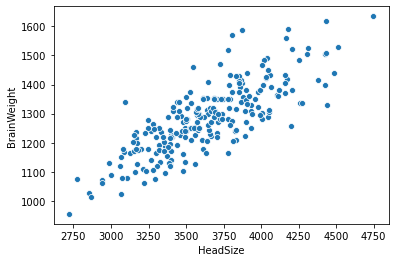

In [8]:
sns.scatterplot(x='HeadSize',y='BrainWeight',data=ds)

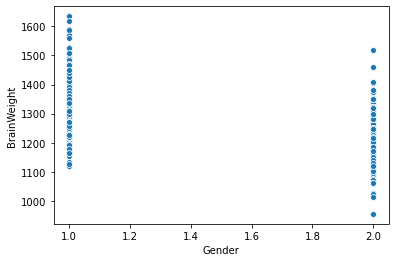

In [9]:
sns.scatterplot(x='Gender',y='BrainWeight',data=ds)

In [10]:
#above graphs show that more the size, more the weight (obvious)
#gender =1 has a upper range of brain weight and gender =2 has lower range of brain weight

(array([ 4., 13., 31., 50., 50., 43., 23., 14.,  8.,  1.]),
 array([2720. , 2922.7, 3125.4, 3328.1, 3530.8, 3733.5, 3936.2, 4138.9,
        4341.6, 4544.3, 4747. ]),
 <a list of 10 Patch objects>)

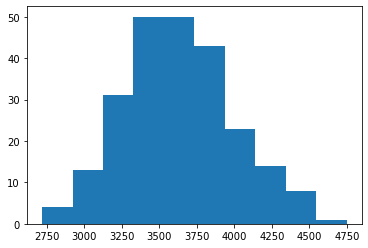

In [11]:
plt.hist('HeadSize',data=ds)

(array([ 3.,  9., 20., 45., 53., 55., 27., 12.,  8.,  5.]),
 array([ 955., 1023., 1091., 1159., 1227., 1295., 1363., 1431., 1499.,
        1567., 1635.]),
 <a list of 10 Patch objects>)

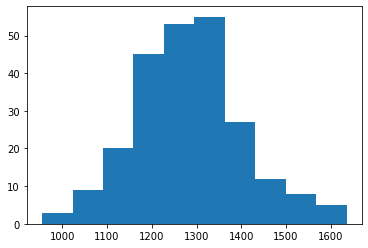

In [12]:
plt.hist('BrainWeight',data=ds)

In [13]:
#observing above graphs there is no skew in the data, the data is sufficiently normal

In [14]:
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)
ds_fin = ds.loc[(z_score<3).all(axis=1)]
print(ds_fin.shape)

(237, 4)
(236, 4)


In [15]:
#one row dropped which was a outlier

In [16]:
ds_fin.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,236.000000,236.000000,236.000000,236.000000
mean,1.436441,1.538136,3629.275424,1281.381356
std,0.496998,0.499603,358.733690,118.378975
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3387.500000,1206.500000
50%,1.000000,2.000000,3613.500000,1280.000000
75%,2.000000,2.000000,3868.500000,1350.000000
max,2.000000,2.000000,4512.000000,1620.000000


In [17]:
#looking at the characteristics of data evrything looks normal
#considering the HeadSize and BrainWeight columns, we can see that there is no much difference betwen each quartile

In [18]:
#lets use linear regression to predict the values
# as per instructions head size is input variable and weight is output

In [19]:
x=ds_fin['HeadSize']
y=ds_fin['BrainWeight']

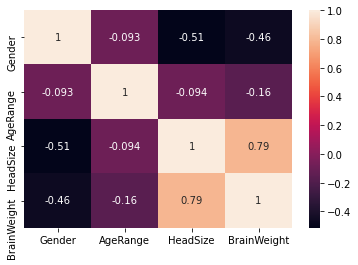

In [20]:
sns.heatmap(ds_fin.corr(),color='k',annot=True)
plt.show()

In [ ]:
#max correlates with head size and gender

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [26]:
print(x_train.shape)
print(y_train.shape)

(188,)
(188,)


In [28]:
x=ds_fin.iloc[:,0:-1]
y=ds_fin.iloc[:,-1]

In [31]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
pred_lr=lr.predict(x_test)

In [33]:
r2_score(y_test,pred_lr)

0.5517413115744896

In [34]:
x1=ds_fin.iloc[:,0:-1]
y1=ds_fin.iloc[:,-1]

In [36]:
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    lr.fit(x1_train,y1_train)
    pred_lr = lr.predict(x1_test)
    x=r2_score(y1_test,pred_lr)
    if x>r2_scr:
        r2_scr = x
        random_state=i

In [37]:
print(r2_scr,random_state)

0.7869605564839262 90


In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x1,y1,cv=5,scoring='r2').mean()

0.485521316604926

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
r2_scr_rfr = 0
random_state_rfr=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    rfr.fit(x1_train,y1_train)
    pred_rfr = rfr.predict(x1_test)
    x=r2_score(y1_test,pred_rfr)
    if x>r2_scr_rfr:
        r2_scr_rfr = x
        random_state_rfr=i
print(r2_scr_rfr,random_state_rfr)
print(r2_score(y1_test,pred_rfr))

0.7803292228718324 49
0.6493797800177261


In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
knn=KNeighborsRegressor(n_neighbors=6)
r2_scr_knn = 0
random_state_knn=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    knn.fit(x1_train,y1_train)
    pred_knn = knn.predict(x1_test)
    x=r2_score(y1_test,pred_knn)
    if x>r2_scr_knn:
        r2_scr_knn = x
        random_state_rfr=i
print(r2_scr_rfr,random_state_knn)
print(r2_score(y1_test,pred_knn))

0.7803292228718324 0
0.6109192047002241


In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x1,y1,cv=5,scoring='r2').mean()

0.40496798949707846

In [ ]:
#finalize linear regression, to improve accuracy we need more data

In [48]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=90)
lr.fit(x1_train,y1_train)
y_pred = lr.predict(x1_test)
print(r2_score(y1_test,y_pred))

0.7869605564839262


In [49]:
import joblib
joblib.dump(lr,'headbrain_lr.pkl')

['headbrain_lr.pkl']